In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
contacts = pd.read_excel('Contacts (Final).xlsx', dtype={'Id': str})
calls = pd.read_excel('Calls (Final).xlsx', dtype={'Id': str, "CONTACTID": str})
spend = pd.read_excel('Spend (Final).xlsx')
deals = pd.read_excel('Deals (Final).xlsx', dtype={'Id': str, 'Contact Name': str})

In [3]:
#Additionally cleaning code
# Replace 0 values in selected numeric columns with NaN to mark them as missing
deals['Initial Amount Paid'] = deals['Initial Amount Paid'].replace(0, np.nan)
deals['Offer Total Amount'] = deals['Offer Total Amount'].replace(0, np.nan)
deals['Course duration'] = deals['Course duration'].replace(0, np.nan)
deals['Months of study'] = deals['Months of study'].replace(0, np.nan)

# Create temporary display columns for visualization: round numbers or label as 'Unknown'
deals['Initial Amount Paid Display'] = deals['Initial Amount Paid'].apply(
    lambda x: 'Unknown' if pd.isna(x) else round(x, 2)
)
deals['Offer Total Amount Display'] = deals['Offer Total Amount'].apply(
    lambda x: 'Unknown' if pd.isna(x) else round(x, 2)
)
deals['Course duration Display'] = deals['Course duration'].apply(
    lambda x: 'Unknown' if pd.isna(x) else round(x, 2)
)
deals['Months of study Display'] = deals['Months of study'].apply(
    lambda x: 'Unknown' if pd.isna(x) else round(x, 2)
)

# If needed, display the temp columns (for viewing only)
print(deals[['Initial Amount Paid Display', 'Offer Total Amount Display',
             'Course duration Display', 'Months of study Display']])

# Drop the temporary display columns to keep only original ones
deals.drop(columns=[
    'Initial Amount Paid Display',
    'Offer Total Amount Display',
    'Course duration Display',
    'Months of study Display'
], inplace=True)

      Initial Amount Paid Display Offer Total Amount Display  \
0                         Unknown                    Unknown   
1                         Unknown                     2000.0   
2                         Unknown                    Unknown   
3                         Unknown                    Unknown   
4                         Unknown                    Unknown   
...                           ...                        ...   
21406                     Unknown                    Unknown   
21407                     Unknown                    Unknown   
21408                     Unknown                    Unknown   
21409                     Unknown                    Unknown   
21410                     Unknown                    Unknown   

      Course duration Display Months of study Display  
0                     Unknown                 Unknown  
1                         6.0                 Unknown  
2                     Unknown                 Unknown  
3      

In [4]:
#deals['Offer Total Amount'] = deals['Offer Total Amount'].replace({1: 1000, 9: 9000})

In [5]:
#deals = pd.read_excel('Deals (Final).xlsx', dtype={'Id': str, 'Contact Name': str})

In [6]:
deals.describe().T

,count,mean,min,25%,50%,75%,max,std
Closing Date,14495,2024-01-28 03:32:47.374956800,2023-07-03 00:00:00,2023-11-12 00:00:00,2024-02-08 00:00:00,2024-04-17 00:00:00,2024-12-11 00:00:00,NaN
Created Time,21411,2024-01-27 09:12:04.786324736,2022-10-11 00:00:00,2023-11-18 16:55:00,2024-02-05 12:34:00,2024-04-13 22:41:00,2024-06-21 15:30:00,NaN
Course duration,3587.0,10.198495,6.0,11.0,11.0,11.0,11.0,1.834681
Months of study,839.0,5.449344,1.0,3.0,5.0,8.0,11.0,2.915598
Initial Amount Paid,3288.0,1177.798966,1.0,1000.0,1000.0,1000.0,11000.0,1416.975959
Offer Total Amount,3338.0,8962.917915,1.0,5000.0,11000.0,11000.0,11500.0,3260.154776
SLA in Seconds,21411.0,83174.413152,0.0,0.0,6516.0,46853.0,26908464.0,627418.272182


📊 Descriptive Statistics Report: Deal Data Analysis
🗓 Deal Dates
Metric	Closing Date	Created Time
Count	14,495	21,411
Average	Jan 28, 2024	Jan 27, 2024
Minimum	July 3, 2023	Oct 11, 2022
25th Percentile	Nov 12, 2023	Nov 18, 2023, 16:55
Median	Feb 8, 2024	Feb 5, 2024, 12:34
75th Percentile	Apr 17, 2024	Apr 13, 2024, 22:41
Maximum	Dec 11, 2024	Jun 21, 2024, 15:30

📌 Insight:
The creation and closing dates are tightly clustered, with an average lag of just 1 day. Most deals fall within a 6-month creation window.

📚 Course Duration & Study Months
Metric	Course Duration (months)	Months of Study
Count	3,587	839
Mean	10.20	5.45
Min	       6	1
25thPer	  11	3
Median	  11	5
75thPer   11 	8
Max	      11	11
Std Dev	  1.83	2.92

📌 Insight:
Most courses are standardized at 11 months, and the months of study are highly variable, suggesting different engagement or progress levels.

💰 Financial Metrics
Metric	Initial Amount Paid (€)	Offer Total Amount (€)
Count	3,288	                3,338
Mean	1,178.71	            8,966.21
Min	    100.00	                1,000.00
25thPer	1,000.00	            5,000.00
Median	1,000.00	            11,000.00
75tPer	1,000.00	            11,000.00
Max	    11,000.00	            11,500.00
Std Dev	1,416.54	            3,254.91

📌 Insight:

Initial payments are mostly €1,000, indicating a standardized deposit system.

Offer amounts cluster at €11,000, but some variability suggests different course pricing or packages.

⏱ SLA – Deal Processing Time (in Seconds)
Metric	SLA Time
Count	21,411
Mean	83,174 sec (~23.1 hours)
Median	6,516 sec (~1.81 hours)
Min	    0 sec
25thPer	0 sec
75thPer	46,853 sec (~13 hours)
Max	    26,908,464 sec (~311 days)
Std Dev	627,418 sec (~174 hours)

📌 Insight:

SLA times are highly skewed with extreme outliers.

Many deals were processed instantly or very quickly, but some took months, which suggests issues with specific workflows or exceptions.

📌 Overall Summary
Course duration is consistent at 11 months for most participants.

Initial payments are typically fixed at €1,000, while offer totals often reach €11,000.

Deal processing times are efficient in general, but large outliers warrant investigation.

The data reveals a high degree of standardization, but also points to specific process inefficiencies or data entry anomalies in SLA metrics.

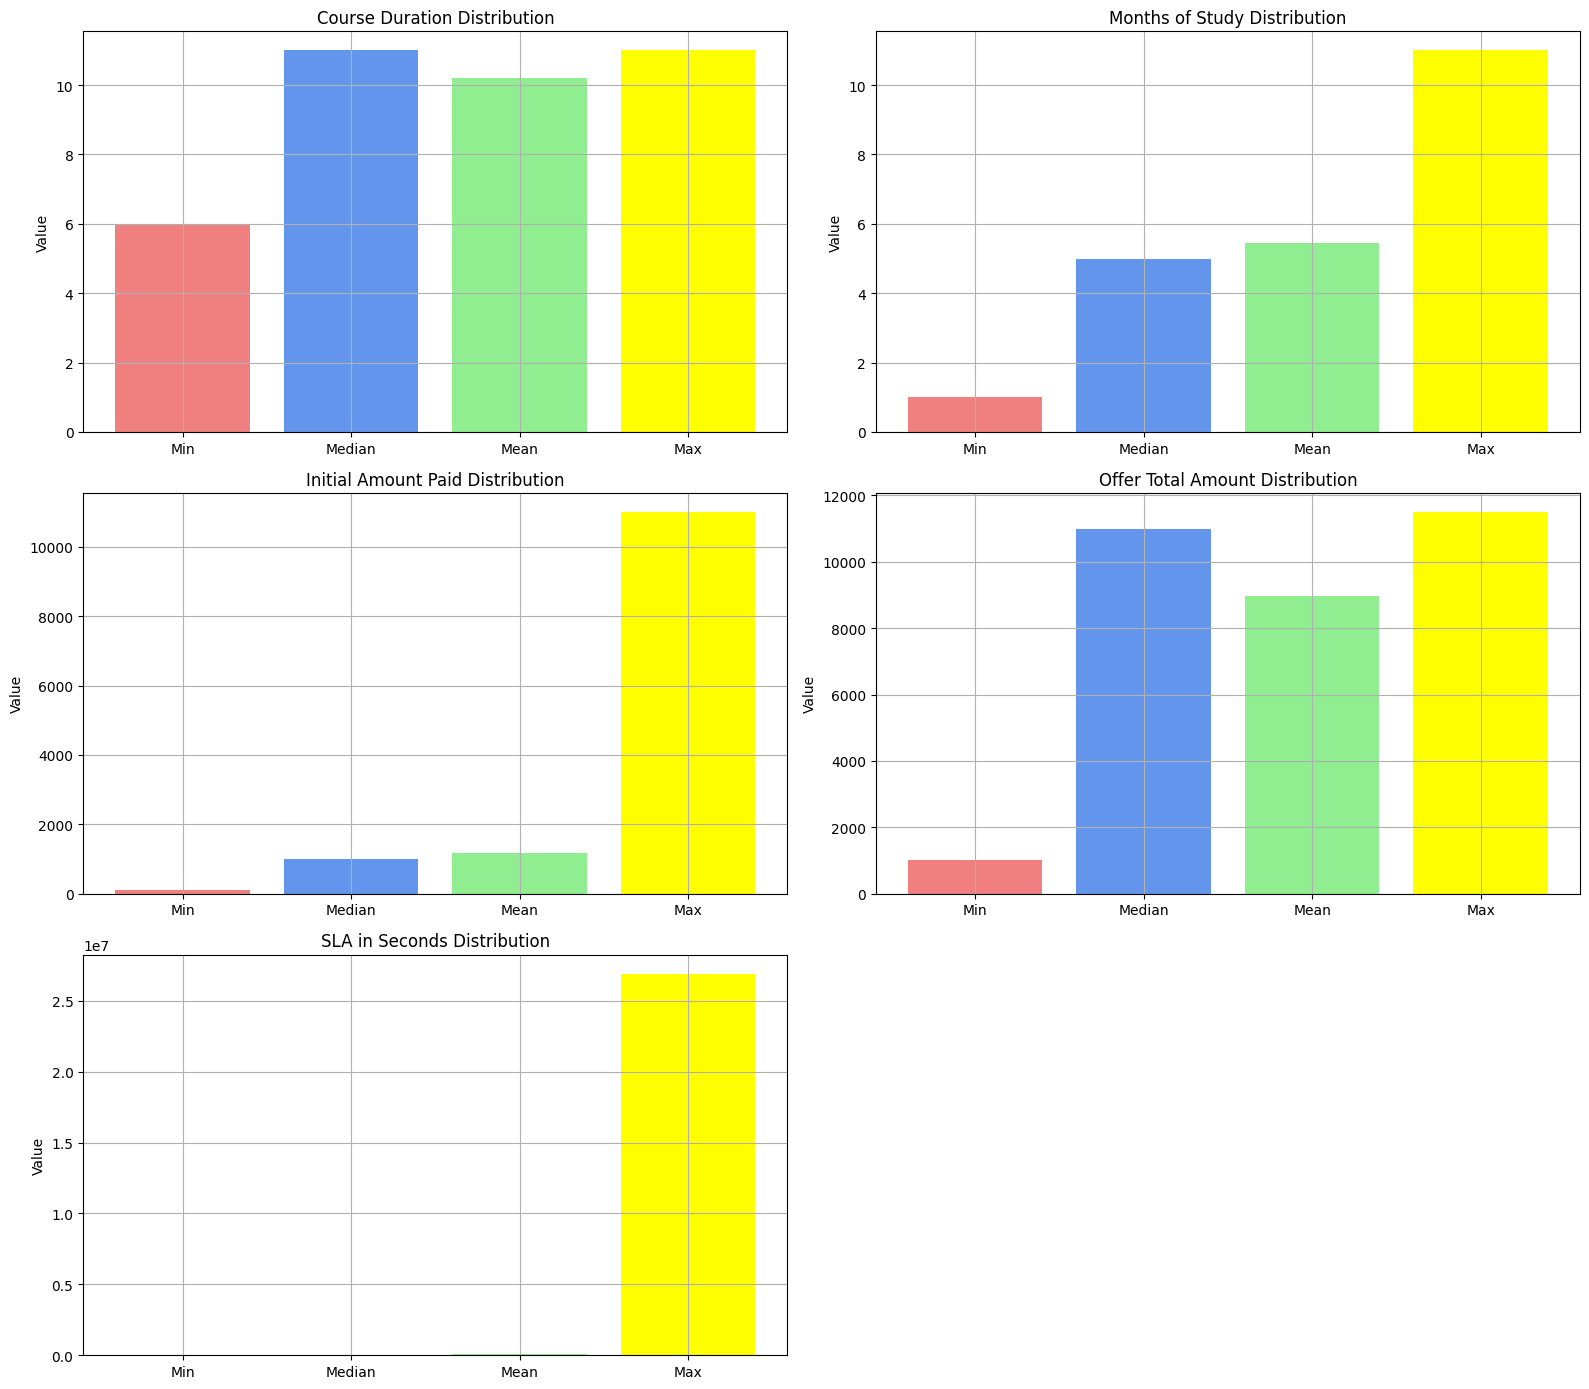

In [7]:
# Create a cleaned DataFrame from the user's summary statistics for plotting
summary_df = pd.DataFrame({
    'Metric': ['Course Duration', 'Months of Study', 'Initial Amount Paid', 'Offer Total Amount', 'SLA in Seconds'],
    'Mean': [10.20, 5.45, 1178.71, 8966.21, 83174.41],
    'Median': [11, 5, 1000.0, 11000.0, 6516.0],
    'Min': [6, 1, 100.0, 1000.0, 0],
    'Max': [11, 11, 11000.0, 11500.0, 26908464.0],
    'Std Dev': [1.83, 2.92, 1416.54, 3254.91, 627418.27]
})

# Set up visualizations
fig, axs = plt.subplots(3, 2, figsize=(16, 14))
axs = axs.flatten()

# Plot metrics
for idx, row in summary_df.iterrows():
    bar_values = [row['Min'], row['Median'], row['Mean'], row['Max']]
    bar_labels = ['Min', 'Median', 'Mean', 'Max']
    axs[idx].bar(bar_labels, bar_values, color=['lightcoral', 'cornflowerblue', 'lightgreen', 'yellow'])
    axs[idx].set_title(f"{row['Metric']} Distribution")
    axs[idx].set_ylabel('Value')
    axs[idx].grid(True)

# Hide the unused subplot
axs[-1].axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Select relevant categorical columns
categorical_columns = ['Quality', 'Stage', 'Source', 'Product']

# Generate descriptive statistics for these categorical variables
categorical_summary = deals[categorical_columns].describe(include='object')

# Also include value counts for more detailed analysis
value_counts = {col: deals[col].value_counts(dropna=False) for col in categorical_columns}

categorical_summary, value_counts

(                  Quality  Stage        Source        Product
 count               21411  21411         21411          21411
 unique                  5     12            13              6
 top     E - Non Qualified   Lost  Facebook Ads  Not specified
 freq                 9741  13810          4843          17819,
 {'Quality': Quality
  E - Non Qualified    9741
  D - Non Target       6228
  C - Low              3452
  B - Medium           1560
  A - High              430
  Name: count, dtype: int64,
  'Stage': Stage
  Lost                         13810
  Payment Done                  3306
  Registered on Webinar         2071
  Call Delayed                  1901
  Qualificated                   111
  Registered on Offline Day       99
  Need to Call - Sales            33
  Need To Call                    31
  Need a consultation             23
  Test Sent                       19
  New Lead                         6
  Waiting For Payment              1
  Name: count, dtype: int64,
  'S

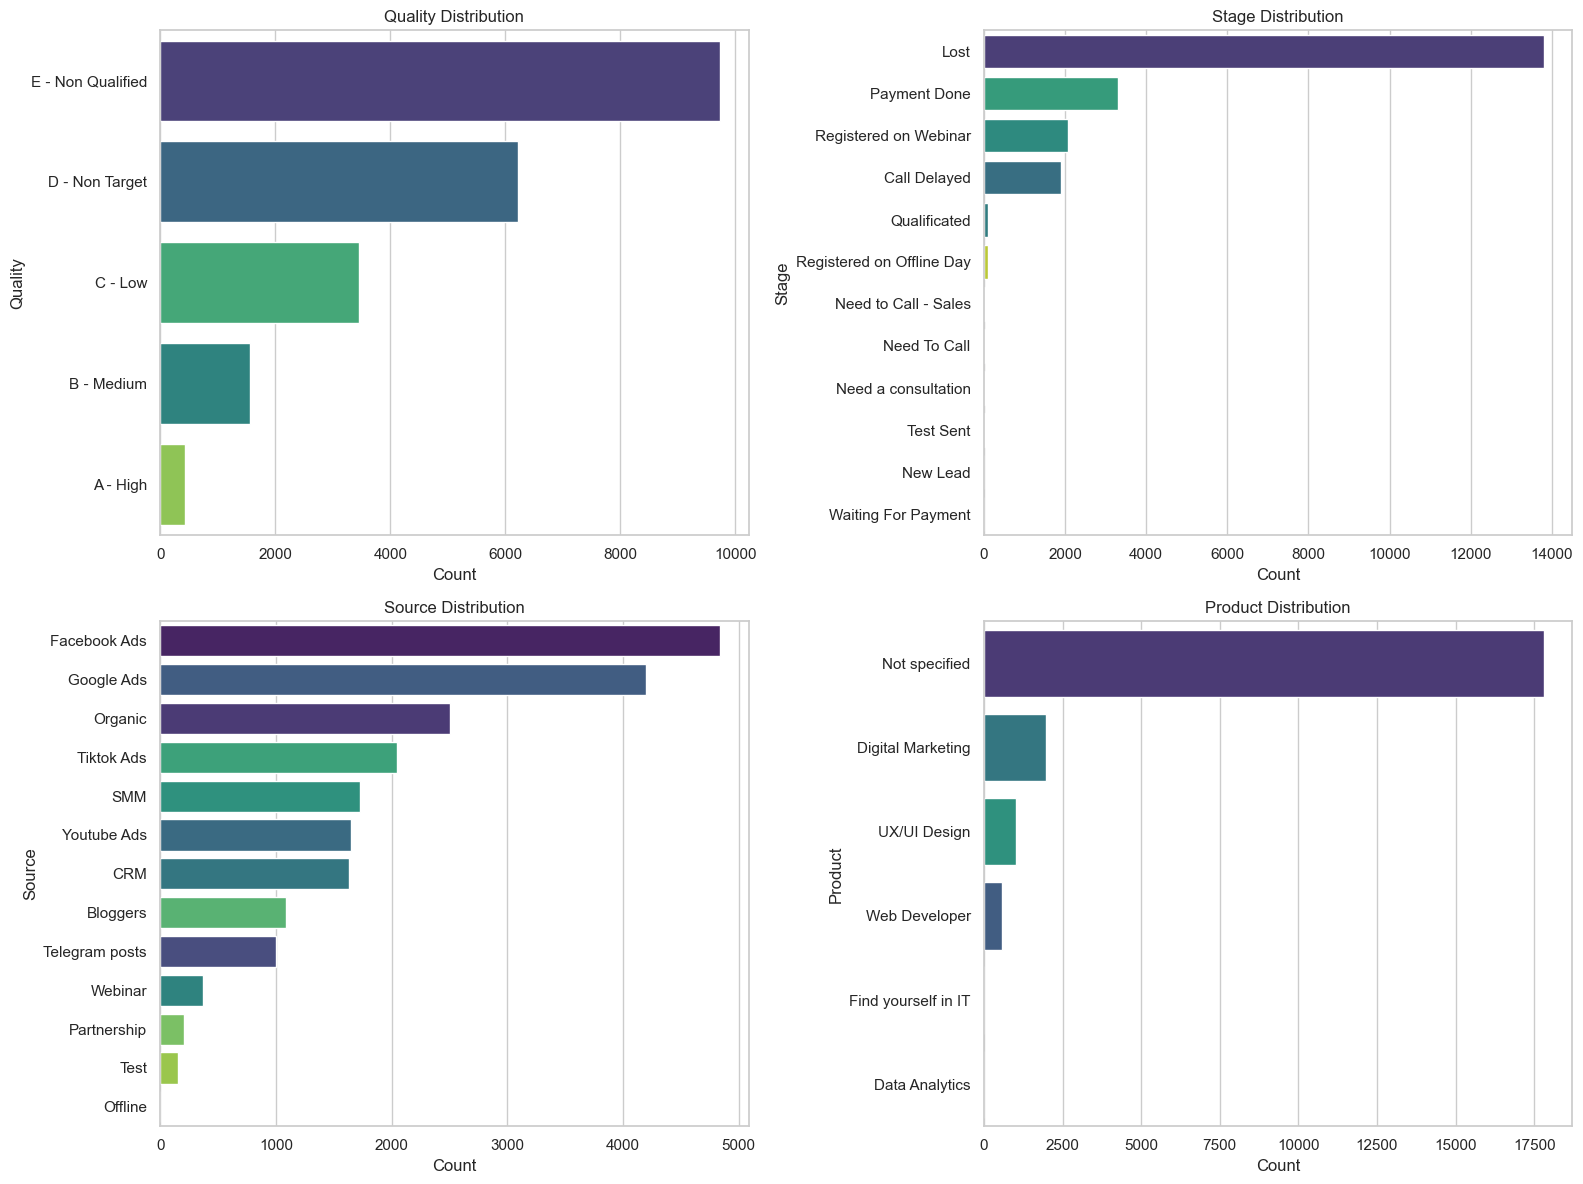

In [9]:
# Set general plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Define categories and titles
categories = ['Quality', 'Stage', 'Source', 'Product']
titles = ['Quality Distribution', 'Stage Distribution', 'Source Distribution', 'Product Distribution']

# Create subplots for each categorical variable
for i, cat in enumerate(categories):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=deals, y=cat, hue=cat, order=deals[cat].value_counts().index, palette='viridis', legend=False)
    plt.title(titles[i])
    plt.xlabel('Count')
    plt.ylabel(cat)

plt.tight_layout()
plt.show()


In [10]:
calls.describe()

,Call Start Time,Call Duration (in seconds)
count,92617,92538.000000
mean,2024-02-04 19:21:56.171329024,170.330178
min,2023-06-30 08:43:00,0.000000
25%,2023-11-23 17:14:00,4.000000
50%,2024-02-16 16:00:00,9.000000
75%,2024-04-22 14:39:00,107.000000
max,2024-06-21 15:31:00,7625.000000
std,NaN,406.944468


📞 Call Duration Analysis
Metric	    Value
Count	    92,538
Mean	    ~170 seconds
Std Dev	    ~407 seconds
Min	         0 seconds
25% (Q1)	 4 seconds
Median (Q2)	 9 seconds
75% (Q3)	 107 seconds
Max	         7,625 seconds (~2 hours, 7 minutes)

Insights:

📉 Short calls dominate: 50% of calls are under 9 seconds, and 75% under 2 minutes — suggesting most calls were unanswered, very short, or perhaps automated.

⚠️ Zero-duration calls exist, which might be system errors or immediate hang-ups.

📈 Some calls were very long (up to 2+ hours), but these are rare outliers.

🕑 Call Start Time Analysis
Metric	       Value
Count	       92,617
Earliest	   2023-06-30 08:43:00
Latest	       2024-06-21 15:31:00
Median	       2024-02-16 16:00:00
25% (Q1)	   2023-11-23 17:14:00
75% (Q3)	   2024-04-22 14:39:00
Mean	      ~2024-02-04 19:22:00

Insights:

📆 The call dataset spans nearly 1 year, from June 2023 to June 2024.

🔥 Most activity seems concentrated around late 2023 to early 2024, based on the quartiles.

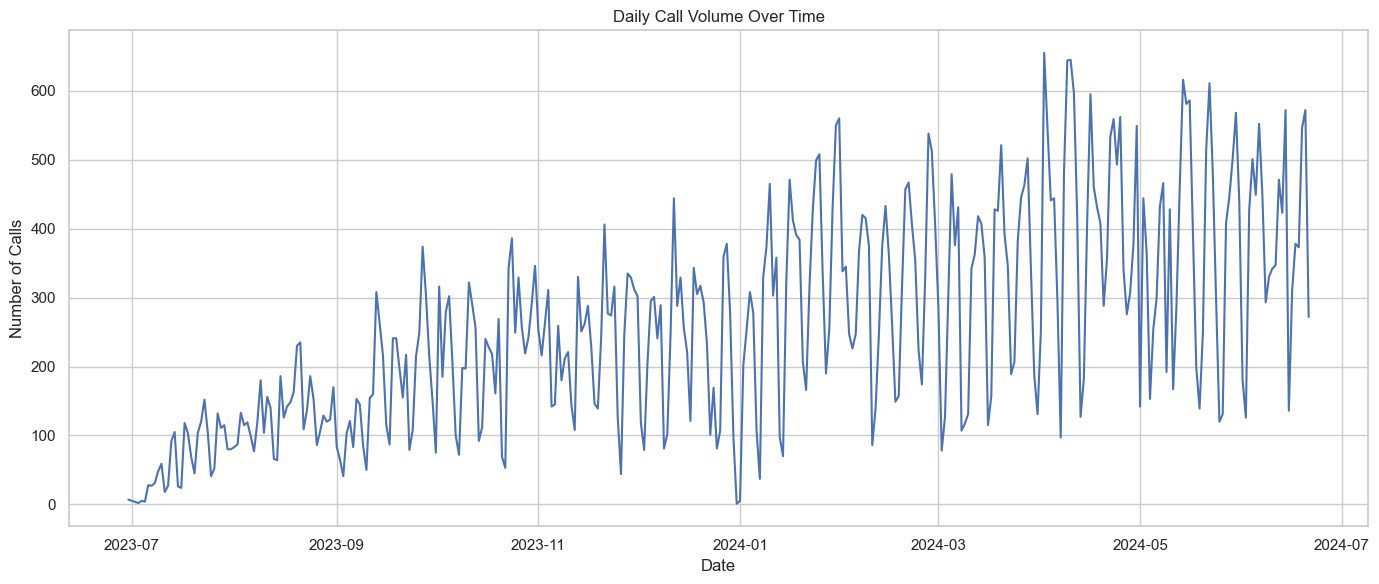

In [11]:
# Volume of calls per period
# Ensure 'Call Start Time' is datetime
calls['Call Start Time'] = pd.to_datetime(calls['Call Start Time'])

# Group by day
daily_calls = calls.groupby(calls['Call Start Time'].dt.date).size()

# Plot
plt.figure(figsize=(14, 6))
daily_calls.plot(kind='line')
plt.title('Daily Call Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.tight_layout()
plt.show()

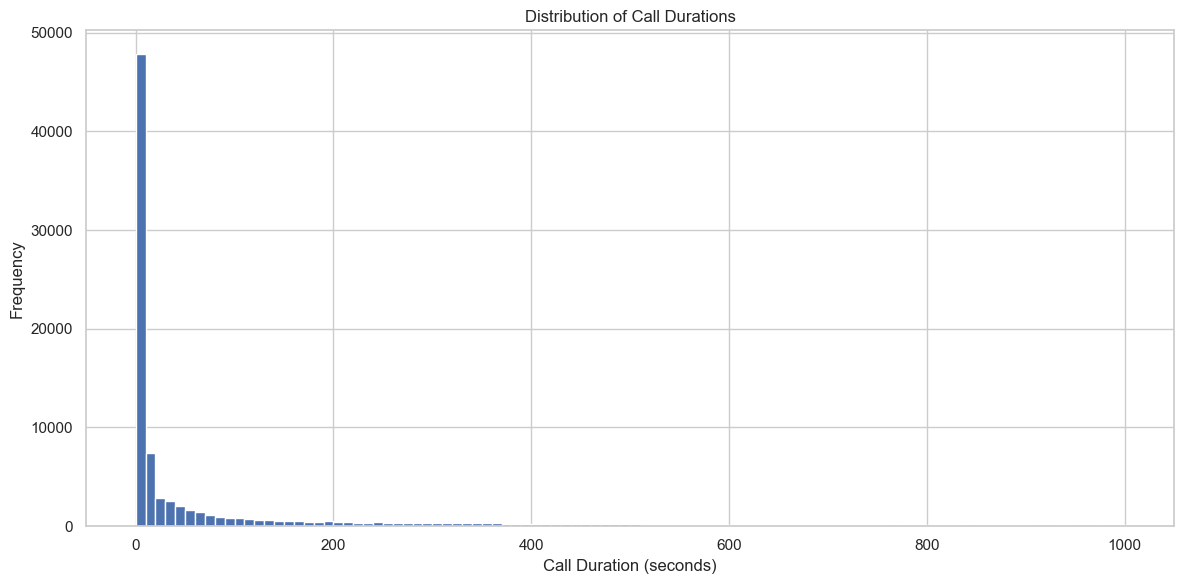

In [12]:
# Call Durations
plt.figure(figsize=(12, 6))
calls['Call Duration (in seconds)'].hist(bins=100, range=(0, 1000))  # Adjust range to cut off extreme outliers
plt.title('Distribution of Call Durations')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
contacts.describe()

,Created Time,Modified Time
count,18510,18510
mean,2024-01-24 14:25:56.155591680,2024-02-15 09:11:05.273905920
min,2023-06-27 11:28:00,2023-07-06 10:54:00
25%,2023-11-15 16:49:15,2023-12-09 14:51:45
50%,2024-02-01 18:44:30,2024-02-29 01:12:30
75%,2024-04-12 16:15:45,2024-04-26 22:40:45
max,2024-06-21 15:30:00,2024-06-21 15:32:00


📄 Contacts Creation and Modification Report
📌 Dataset Overview
Total records: 18,510 contacts

Data tracks creation and modification timestamps for each contact.

🕓 Created Time Analysis
Metric	       Value
Min	           2023-06-27 11:28:00
25%	           2023-11-15 16:49:15
Median	       2024-02-01 18:44:30
75%	           2024-04-12 16:15:45
Max	           2024-06-21 15:30:00
Mean	       ~2024-01-24 14:26

Insights:

👥 Contact creation started in June 2023 and continued through June 2024.

🔥 The main period of activity is between November 2023 and April 2024, where 50% of contacts were created.

📈 The median creation date is Feb 1, 2024, indicating consistent growth up to mid-2024.

✏️ Modified Time Analysis
Metric	          Value
Min	              2023-07-06 10:54:00
25%	              2023-12-09 14:51:45
Median	          2024-02-29 01:12:30
75%	              2024-04-26 22:40:45
Max	              2024-06-21 15:32:00
Mean	          ~2024-02-15 09:11

Insights:

✍️ Contacts are being actively updated, with a slightly more recent average timestamp than creation.

The peak modification period is also between December 2023 and April 2024.

The latest updates are happening up to June 21, 2024, showing the system is still in use.

📊 Recommendations
✅ You may want to plot daily or weekly contact creation rates to analyze growth trends or campaign effectiveness.

⚠️ Consider reviewing any contacts with large gaps between Created and Modified — this could indicate delays in follow-up or enrichment.

🧹 Optionally audit stale contacts — those that were created long ago and haven't been modified since — for cleanup or re-engagement.

In [14]:
spend.describe()

,Date,Impressions,Spend,Clicks
count,16393,16393.000000,16393.000000,16393.000000
mean,2024-01-11 14:01:10.713109248,3115.903739,9.121177,30.403770
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-10 00:00:00,15.000000,0.120000,0.000000
50%,2024-01-22 00:00:00,203.000000,1.740000,4.000000
75%,2024-04-12 00:00:00,951.000000,8.090000,17.000000
max,2024-06-21 00:00:00,431445.000000,774.000000,2415.000000
std,NaN,12802.939558,29.835332,94.953971


📈 Marketing Spend Performance Report
🕒 Date Range
Metric	    Value
Earliest	2023-07-03
25%	        2023-10-10
Median	    2024-01-22
75%	        2024-04-12
Latest	    2024-06-21
Total Days	~12 months (July 2023 to June 2024)

📌 Insight: The data covers nearly a full year of ad performance, with the bulk of spend activity concentrated between October 2023 and April 2024.

👀 Impressions
Metric	Value
Mean	3,116
Median	203
Max	    431,445
Std Dev	12,803

📌 Insight: Very high standard deviation and maximum suggest outliers—a few days had massive reach, while the majority were modest (Q1 = 15).

💰 Spend
Metric	Value
Mean	9.12
Median	1.74
Max	    774.00
Std Dev	29.83

📌 Insight:

Most daily spends are low to moderate.

A small number of campaigns had very high spend days (outliers), which skews the average.

25% of days had spend under $0.12, possibly unpaid test impressions or low-budget days.

🖱️ Clicks
Metric	Value
Mean	30.4
Median	4
Max	    2,415
Std Dev	95.0

📌 Insight:

Majority of days had low click counts.

Large campaigns created major spikes (e.g., 2,415 clicks on a single day).

25% of days had 0 clicks, possibly indicating wasted impressions or poorly performing creatives.